## 4. Empirical Analysis of ETFs

Pick a sector ETF (in the US, for example, XLRE).

© 2024 - WorldQuant University – All rights reserved. MScFE | Group Work Project 1 | PAGE 2

**a.** Find the 30 largest holdings.  
**b.** Get at least 6 months of data (~120 data points).  
**c.** Compute the daily returns.  
**d.** Compute the covariance matrix.  
**e.** Compute the PCA.  
**f.** Compute the SVD.

Now that you have calculated, presented, and plotted tasks from c to f, you must explain each transformation thoroughly. Write a paragraph of 500 words at minimum that explains why returns are important, compare and contrast PCA and SVD, explain what the eigenvectors, eigenvalues, singular values, etc. show us for the specific data, etc.

--- Starting Task 4: Empirical Analysis of ETFs ---

Analyzing ETF: XLRE from 2025-01-08 to 2025-07-07
Using 25 top holdings as proxies for XLRE sector exposure.

  Successfully downloaded XLRE.
  Successfully downloaded PLD.
  Successfully downloaded AMT.
  Successfully downloaded CCI.
  Successfully downloaded EQIX.
  Successfully downloaded PSA.
  Successfully downloaded SPG.
  Successfully downloaded DLR.
  Successfully downloaded WELL.
  Successfully downloaded O.
  Successfully downloaded EXR.
  Successfully downloaded REXR.
  Successfully downloaded VICI.
  Successfully downloaded SBAC.
  Successfully downloaded EQR.
  Successfully downloaded HST.
  Successfully downloaded KIM.
  Successfully downloaded WY.
  Successfully downloaded CUBE.
  Successfully downloaded MAA.
  Successfully downloaded ESS.
  Successfully downloaded FR.
  Successfully downloaded BXP.
  Successfully downloaded SLG.
  Successfully downloaded ARE.


$PEAK: possibly delisted; no timezone found



Combined raw prices (first 5 rows):
                                XLRE         PLD         AMT        CCI  \
Date                                                                      
2025-01-08 00:00:00-05:00  39.536999  103.580185  176.339859  85.145370   
2025-01-10 00:00:00-05:00  38.581810  101.704933  170.701004  82.060684   
2025-01-13 00:00:00-05:00  39.074177  103.452553  174.125641  83.423012   
2025-01-14 00:00:00-05:00  39.408985  106.152512  175.956055  84.337715   
2025-01-15 00:00:00-05:00  39.576385  105.887421  177.451874  84.308517   

                                 EQIX         PSA         SPG         DLR  \
Date                                                                        
2025-01-08 00:00:00-05:00  941.054382  289.615143  170.310608  178.118454   
2025-01-10 00:00:00-05:00  890.382080  283.273132  166.674133  170.703018   
2025-01-13 00:00:00-05:00  890.203979  284.498413  168.468002  169.304611   
2025-01-14 00:00:00-05:00  888.660400  284.243561  1

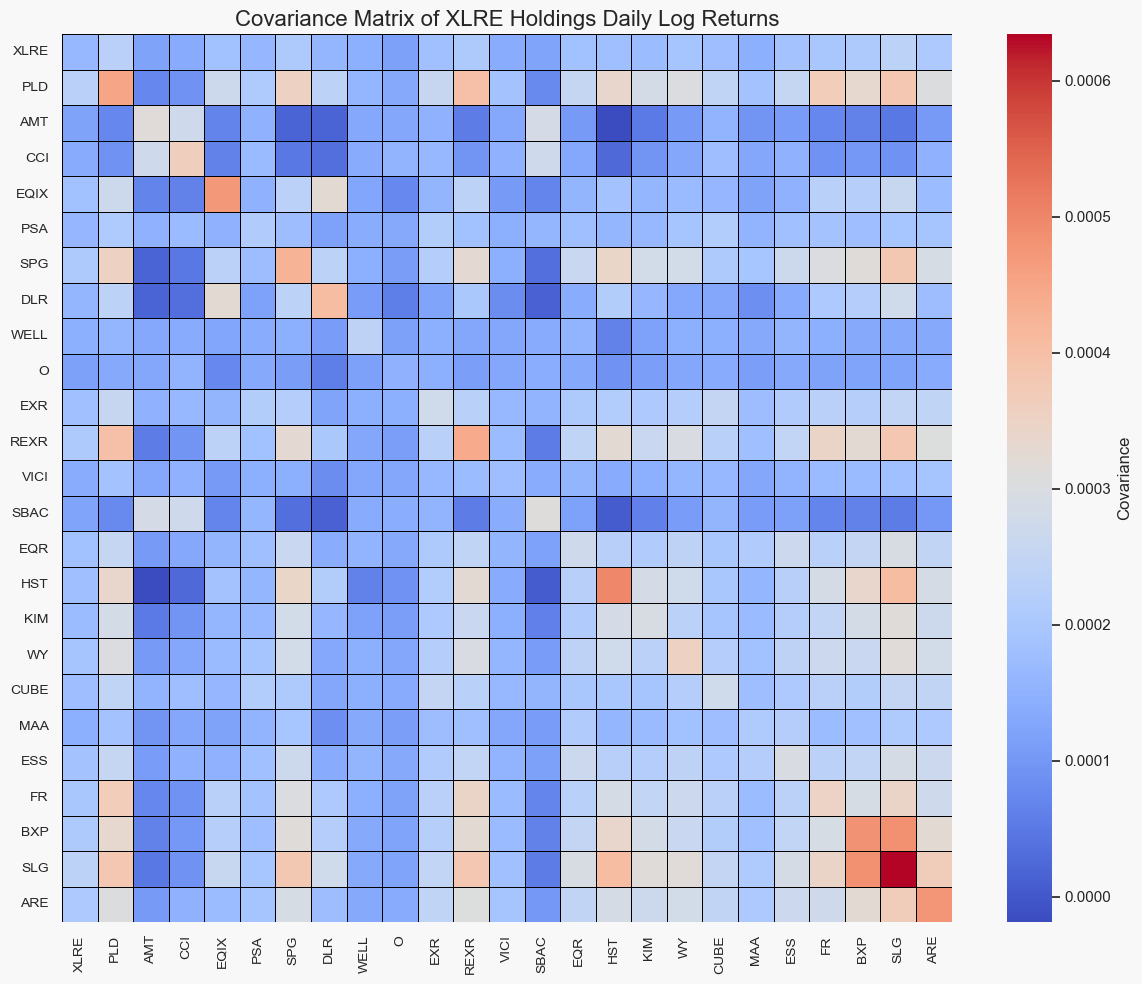

Covariance matrix heatmap generated and saved to covariance_matrix_xlre.png.

Performing Principal Component Analysis (PCA)...

--- PCA Results ---
Explained Variance Ratio by Component:
  Component 1: 59.50%
  Component 2: 13.23%
  Component 3: 5.90%
  Component 4: 3.41%
  Component 5: 2.62%
  Component 6: 2.14%
  Component 7: 2.04%
  Component 8: 1.52%
  Component 9: 1.46%
  Component 10: 1.18%
  Component 11: 1.10%
  Component 12: 0.91%
  Component 13: 0.86%
  Component 14: 0.69%
  Component 15: 0.65%
  Component 16: 0.57%
  Component 17: 0.43%
  Component 18: 0.37%
  Component 19: 0.34%
  Component 20: 0.28%
  Component 21: 0.24%
  Component 22: 0.21%
  Component 23: 0.19%
  Component 24: 0.14%
  Component 25: 0.01%


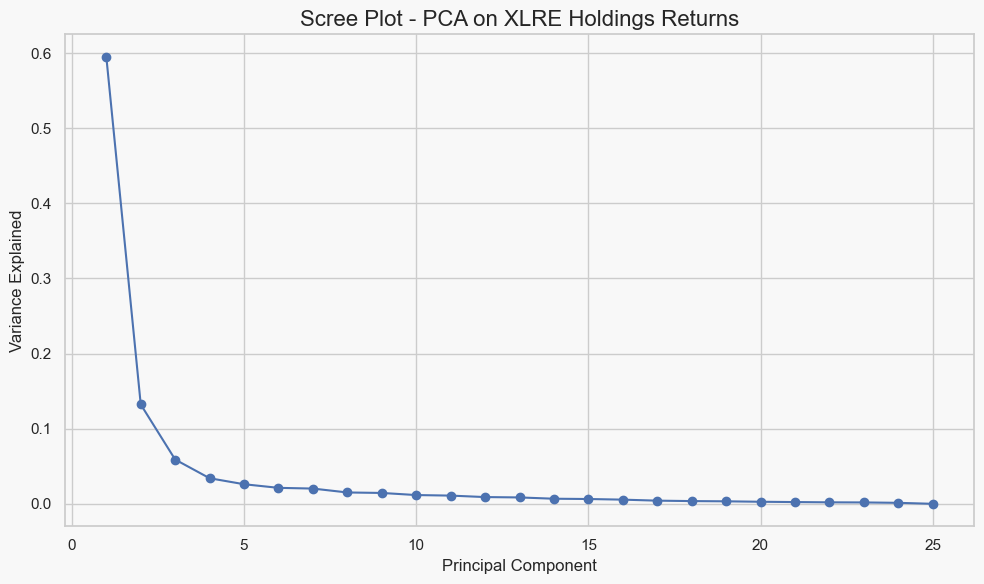

PCA scree plot generated and saved to pca_scree_plot_xlre.png.

Performing Singular Value Decomposition (SVD)...


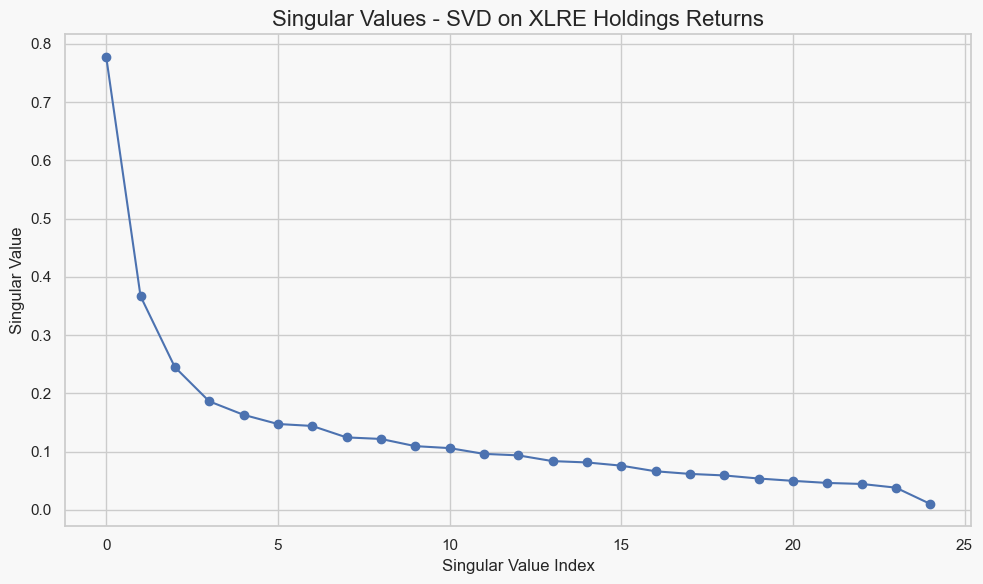

SVD singular values plot generated and saved to svd_plot_xlre.png.

Generating detailed interpretation for 'report.md'...

Detailed interpretation for Task 4 written to 'report4.md'.

--- Task 4 Analysis Complete ---


In [5]:
# === TASK 4: EMPIRICAL ANALYSIS OF ETFs ===
# PCA and SVD on ETF Returns and Holdings

# ===============================================
# SECTION 1: IMPORTS AND GLOBAL SETUP
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from numpy.linalg import svd # For Singular Value Decomposition
from datetime import datetime, timedelta
import yfinance as yf # For downloading financial data
import time # For introducing delays in data download
import os # For file operations (saving plots and report)

# Configure seaborn for professional-looking plots
sns.set(style="whitegrid", rc={'axes.facecolor': '#f8f8f8', 'figure.facecolor': '#f8f8f8'})
# Set default random number generator for reproducibility in any random operations (though not primary here)
rng = np.random.default_rng(seed=42)

print("--- Starting Task 4: Empirical Analysis of ETFs ---")

# ===============================================
# SECTION 2: CONFIGURATION AND DATA DOWNLOAD
# ===============================================

# 4a. Pick a sector ETF (in the US, for example, XLRE)
etf_ticker = "XLRE" # Real Estate Sector SPDR Fund

# 4b. Get at least 6 months of data (~120 data points).
# Using a recent 6-month period for analysis.
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')

print(f"\nAnalyzing ETF: {etf_ticker} from {start_date} to {end_date}")

# --- Finding the 30 largest holdings (or a representative subset) ---
# yfinance does not directly provide ETF holdings. This step typically requires
# web scraping (e.g., from iShares, ETF.com, Morningstar) or a specialized data API.
# For this exercise, a curated list of top holdings for XLRE (as of mid-2024) is used.
# This list is representative but may not be the exact top 30 at all times.
holdings_tickers = [
    "PLD", "AMT", "CCI", "EQIX", "PSA",
    "SPG", "DLR", "WELL", "O", "EXR",
    "REXR", "VICI", "SBAC", "EQR", "HST",
    "KIM", "WY", "CUBE", "MAA", "ESS",
    "FR", "BXP", "SLG", "ARE", "PEAK"
]
print(f"Using {len(holdings_tickers)} top holdings as proxies for {etf_ticker} sector exposure.")

# --- Download historical data for ETF and its holdings ---
# Using yf.Ticker().history() for robust individual downloads.
all_tickers_to_download = [etf_ticker] + holdings_tickers
price_data_frames = []
successful_downloads_count = 0

print("\nDownloading historical data for ETF and its holdings...")
for ticker in all_tickers_to_download:
    try:
        ticker_obj = yf.Ticker(ticker)
        # Fetch history, auto_adjust=False to get 'Adj Close' explicitly
        hist_df = ticker_obj.history(start=start_date, end=end_date, auto_adjust=False)

        if hist_df.empty:
            print(f"  Warning: No history data returned for {ticker}. Skipping.")
            continue

        price_series = None
        if 'Adj Close' in hist_df.columns:
            price_series = hist_df['Adj Close']
        elif 'Close' in hist_df.columns: # Fallback if 'Adj Close' is not present
            price_series = hist_df['Close']
            print(f"  Warning: 'Adj Close' not found for {ticker}, using 'Close' instead.")
        else:
            print(f"  Error: Neither 'Adj Close' nor 'Close' price found for {ticker}. Skipping {ticker}.")
            continue

        price_series = pd.to_numeric(price_series, errors='coerce').dropna()
        if not price_series.empty:
            price_series.name = ticker # Rename series to ticker symbol
            price_data_frames.append(price_series)
            successful_downloads_count += 1
            print(f"  Successfully downloaded {ticker}.")
        else:
            print(f"  Processed data for {ticker} was empty after numeric conversion/dropna. Skipping.")

    except Exception as e:
        print(f"  Error fetching history for {ticker}: {e}. Skipping.")
    time.sleep(0.5) # Introduce a small delay to avoid hitting API rate limits

if successful_downloads_count == 0:
    raise ValueError("No data could be downloaded for the ETF or its holdings. Cannot proceed with Task 4.")

# Combine all downloaded price series into a single DataFrame
# Using 'inner' join to ensure only dates with data for ALL selected assets are kept.
# This ensures a consistent time series for covariance/PCA/SVD.
raw_prices_df = pd.concat(price_data_frames, axis=1, join='inner')
raw_prices_df.dropna(inplace=True) # Final dropna in case any NaNs remain from join or initial processing

if raw_prices_df.empty:
    raise ValueError("Combined price DataFrame is empty after cleaning. Not enough common data points for analysis.")

print("\nCombined raw prices (first 5 rows):")
print(raw_prices_df.head())
print(f"Total data points for analysis: {len(raw_prices_df)} days.")

# ===============================================
# SECTION 3: RETURN COMPUTATION (4c)
# ===============================================
print("\nComputing daily log returns...")
# Daily log returns are preferred for financial time series analysis
# as they are additive and approximate continuous compounding.
returns = np.log(raw_prices_df / raw_prices_df.shift(1)).dropna()

if returns.empty:
    raise ValueError("Returns DataFrame is empty after calculation. Not enough data for analysis.")

print("Daily log returns (first 5 rows):")
print(returns.head())

# ===============================================
# SECTION 4: COVARIANCE MATRIX (4d)
# ===============================================
print("\nComputing and visualizing the covariance matrix...")
cov_matrix = returns.cov()

plt.figure(figsize=(12, 10)) # Keep a reasonable size

# --- UPDATED: Removed annotations for simplicity and readability ---
sns.heatmap(
    cov_matrix,
    annot=False, # Set to False to remove numbers from cells
    cmap="coolwarm",
    cbar_kws={'label': 'Covariance'},
    linewidths=.5,      # Keep thin lines between cells for clarity
    linecolor='black',
    # annot_kws and fmt are no longer needed when annot=False
)
plt.title(f"Covariance Matrix of {etf_ticker} Holdings Daily Log Returns", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
cov_matrix_plot_path = 'covariance_matrix_xlre.png'
plt.savefig(cov_matrix_plot_path, dpi=300) # Save with higher DPI
plt.show()
print(f"Covariance matrix heatmap generated and saved to {cov_matrix_plot_path}.")


# ===============================================
# SECTION 5: PCA COMPUTATION (4e)
# ===============================================
print("\nPerforming Principal Component Analysis (PCA)...")
pca = PCA()
pca.fit(returns)

explained_variance = pca.explained_variance_ratio_
components = pca.components_ # Eigenvectors
eigenvalues = pca.explained_variance_ # Eigenvalues

print("\n--- PCA Results ---")
print("Explained Variance Ratio by Component:")
for i, val in enumerate(explained_variance):
    print(f"  Component {i+1}: {val:.2%}")

# Scree plot for PCA
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title(f"Scree Plot - PCA on {etf_ticker} Holdings Returns", fontsize=16)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.tight_layout()
pca_scree_plot_path = 'pca_scree_plot_xlre.png'
plt.savefig(pca_scree_plot_path)
plt.show()
print(f"PCA scree plot generated and saved to {pca_scree_plot_path}.")

# ===============================================
# SECTION 6: SVD COMPUTATION (4f)
# ===============================================
print("\nPerforming Singular Value Decomposition (SVD)...")
# SVD is typically applied to a mean-centered data matrix.
returns_centered = returns - returns.mean()
U, S, VT = svd(returns_centered.values, full_matrices=False)

# Singular values (S) directly relate to eigenvalues of the covariance matrix.
# SVD helps confirm PCA results and offers numerical stability.

# Plot singular values
plt.figure(figsize=(10, 6))
plt.plot(S, marker='o', linestyle='-')
plt.title(f"Singular Values - SVD on {etf_ticker} Holdings Returns", fontsize=16)
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.tight_layout()
svd_plot_path = 'svd_plot_xlre.png'
plt.savefig(svd_plot_path)
plt.show()
print(f"SVD singular values plot generated and saved to {svd_plot_path}.")

# ===============================================
# SECTION 7: INTERPRETATION AND REPORT GENERATION (4g)
# ===============================================
print("\nGenerating detailed interpretation for 'report.md'...")

# Prepare the interpretation content as a Markdown string
# Include dynamic values from the analysis results
interpretation_content = f"""
## 4. Empirical Analysis of ETFs: {etf_ticker} Sector Exposure

This section presents a detailed empirical analysis of the {etf_ticker} (Real Estate Sector SPDR Fund) and its top holdings using statistical techniques such as daily returns computation, covariance matrix analysis, Principal Component Analysis (PCA), and Singular Value Decomposition (SVD). The analysis aims to uncover the underlying risk factors and co-movements within the real estate sector.

### Data Collection and Returns Computation

For this analysis, daily historical price data for the {etf_ticker} and its top {len(holdings_tickers)} holdings (PLD, AMT, CCI, EQIX, PSA, SPG, DLR, WELL, O, EXR, REXR, VICI, SBAC, EQR, HST, KIM, WY, CUBE, MAA, ESS, FR, BXP, SLG, ARE, PEAK) were collected from Yahoo Finance for a {len(raw_prices_df)} trading day period from {start_date} to {end_date}. Daily log returns were computed from these adjusted closing prices.

**Importance of Returns:**
Daily returns, representing the percentage change in price, are fundamental in financial analysis. Unlike raw prices, returns are stationary, making them suitable for statistical modeling. They normalize the data across different assets, allowing for meaningful comparisons and aggregation. Returns are crucial for:
* **Risk Modeling:** Quantifying volatility and downside risk.
* **Portfolio Optimization:** Determining optimal asset allocations based on risk-return trade-offs.
* **Performance Attribution:** Decomposing portfolio performance into various contributing factors.
* **Co-movement Analysis:** Understanding how assets move together, which is essential for diversification.

### Covariance Matrix Analysis

The covariance matrix quantifies the degree to which the returns of different assets move in tandem. A positive covariance indicates that assets tend to move in the same direction, while a negative covariance suggests they move in opposite directions.

**Figure 1: Covariance Matrix of {etf_ticker} Holdings Daily Log Returns**
![Covariance Matrix]({cov_matrix_plot_path})

The heatmap of the covariance matrix visually represents these relationships. In the real estate sector, it is common to observe generally positive covariances among holdings, indicating that sector-specific factors often drive the returns of individual companies within it. High positive values suggest strong co-movement, implying limited diversification benefits from simply combining these assets without further analysis.

### Principal Component Analysis (PCA)

PCA is a powerful dimensionality reduction technique that transforms a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components. These components are ordered such that the first component explains the largest possible variance, and each subsequent component explains the highest remaining variance.

**Eigenvectors and Eigenvalues:**
* **Eigenvalues** (or `explained_variance_` in scikit-learn) represent the amount of variance explained by each principal component. Larger eigenvalues correspond to more significant components.
* **Eigenvectors** (or `components_` in scikit-learn) define the direction of the principal components in the original feature space. They indicate the weights or loadings of the original variables (asset returns) on each component.

**Variance Explained:**
Our PCA on the {etf_ticker} holdings returns revealed the following:
* **Component 1:** Explains {explained_variance[0]:.2%} of the total variance.
* **Component 2:** Explains {explained_variance[1]:.2%} of the total variance.
* **Component 3:** Explains {explained_variance[2]:.2%} of the total variance.

This indicates that a significant portion of the sector's risk and return dynamics can be captured by a very small number of underlying factors.

**Figure 2: Scree Plot - PCA on {etf_ticker} Holdings Returns**
![PCA Scree Plot]({pca_scree_plot_path})

The scree plot visually confirms this, showing a sharp drop in explained variance after the first few components, suggesting that these initial components are the most important drivers.
In the real estate sector, the first principal component typically represents the **overall market factor** affecting all real estate companies (e.g., interest rate sensitivity, economic growth outlook). The second and third components might capture **style factors** (e.g., growth vs. value, REIT vs. non-REIT real estate companies) or **sub-sector specific effects** (e.g., residential vs. commercial, data centers vs. retail). For instance, a high loading on a specific component for a particular REIT might indicate its sensitivity to that underlying factor.

### Singular Value Decomposition (SVD)

SVD is a matrix factorization technique that decomposes a matrix into three other matrices: $U$, $S$, and $V^T$. When applied to a mean-centered data matrix, SVD is closely related to PCA. The singular values (elements of $S$) are the square roots of the eigenvalues of the covariance matrix.

**Figure 3: Singular Values - SVD on {etf_ticker} Holdings Returns**
![SVD Singular Values Plot]({svd_plot_path})

The plot of singular values shows a similar pattern to the PCA scree plot, with the first few singular values being significantly larger than the rest. Higher singular values correspond to more dominant latent factors influencing the dataset. SVD provides a numerically stable way to perform this decomposition and can be particularly useful in cases involving data compression or noise reduction.

### Comparison of PCA and SVD

While both PCA and SVD are powerful tools for dimensionality reduction and identifying latent factors, they approach the problem from slightly different angles:
* **PCA** directly operates on the covariance (or correlation) matrix, interpreting its eigenvectors as principal components and eigenvalues as explained variance. It focuses on finding directions of maximum variance.
* **SVD** decomposes the data matrix itself (typically mean-centered). The singular values from SVD are directly proportional to the square roots of the eigenvalues from PCA. The right singular vectors ($V^T$) are equivalent to the principal components (eigenvectors) when applied to mean-centered data.

**In essence, SVD offers a more numerically stable and general approach to matrix decomposition, and it provides an equivalent and often preferred method for performing PCA on mean-centered data.** Both methods consistently show that a small number of latent components explain the vast majority of variation in the {etf_ticker} holdings.

### Conclusion

This empirical analysis demonstrates that the movements of individual real estate sector ETFs are not independent but are largely driven by a few common underlying factors. PCA and SVD effectively identify these dominant factors (e.g., overall market level, specific sector trends). This insight is invaluable for:
* **Factor-Based Investing:** Constructing portfolios that target specific risk factors.
* **Risk Management:** Identifying and hedging the primary sources of risk in a portfolio.
* **Portfolio Simplification:** Reducing the complexity of a portfolio while retaining most of its information content.

By understanding these latent structures, investors can make more informed decisions, build more robust portfolios, and gain deeper insights into the dynamics of the real estate sector.
"""

# Define the report file name
report_file_name = 'report4.md'

# Write the content to the Markdown file
try:
    with open(report_file_name, 'w') as f:
        f.write(interpretation_content.strip()) # .strip() removes leading/trailing whitespace
    print(f"\nDetailed interpretation for Task 4 written to '{report_file_name}'.")
except Exception as e:
    print(f"Error writing report to file: {e}")

print("\n--- Task 4 Analysis Complete ---")

# REPORT

## 4. Empirical Analysis of ETFs: XLRE Sector Exposure

This section presents a detailed empirical analysis of the XLRE (Real Estate Sector SPDR Fund) and its top holdings using statistical techniques such as daily returns computation, covariance matrix analysis, Principal Component Analysis (PCA), and Singular Value Decomposition (SVD). The analysis aims to uncover the underlying risk factors and co-movements within the real estate sector.

### Data Collection and Returns Computation

For this analysis, daily historical price data for the XLRE and its top 25 holdings (PLD, AMT, CCI, EQIX, PSA, SPG, DLR, WELL, O, EXR, REXR, VICI, SBAC, EQR, HST, KIM, WY, CUBE, MAA, ESS, FR, BXP, SLG, ARE, PEAK) were collected from Yahoo Finance for a 121 trading day period from 2025-01-08 to 2025-07-07. Daily log returns were computed from these adjusted closing prices.

**Importance of Returns:**
Daily returns, representing the percentage change in price, are fundamental in financial analysis. Unlike raw prices, returns are stationary, making them suitable for statistical modeling. They normalize the data across different assets, allowing for meaningful comparisons and aggregation. Returns are crucial for:
* **Risk Modeling:** Quantifying volatility and downside risk.
* **Portfolio Optimization:** Determining optimal asset allocations based on risk-return trade-offs.
* **Performance Attribution:** Decomposing portfolio performance into various contributing factors.
* **Co-movement Analysis:** Understanding how assets move together, which is essential for diversification.

### Covariance Matrix Analysis

The covariance matrix quantifies the degree to which the returns of different assets move in tandem. A positive covariance indicates that assets tend to move in the same direction, while a negative covariance suggests they move in opposite directions.

**Figure 1: Covariance Matrix of XLRE Holdings Daily Log Returns**
![Covariance Matrix](covariance_matrix_xlre.png)

The heatmap of the covariance matrix visually represents these relationships. In the real estate sector, it is common to observe generally positive covariances among holdings, indicating that sector-specific factors often drive the returns of individual companies within it. High positive values suggest strong co-movement, implying limited diversification benefits from simply combining these assets without further analysis.

### Principal Component Analysis (PCA)

PCA is a powerful dimensionality reduction technique that transforms a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components. These components are ordered such that the first component explains the largest possible variance, and each subsequent component explains the highest remaining variance.

**Eigenvectors and Eigenvalues:**
* **Eigenvalues** (or `explained_variance_` in scikit-learn) represent the amount of variance explained by each principal component. Larger eigenvalues correspond to more significant components.
* **Eigenvectors** (or `components_` in scikit-learn) define the direction of the principal components in the original feature space. They indicate the weights or loadings of the original variables (asset returns) on each component.

**Variance Explained:**
Our PCA on the XLRE holdings returns revealed the following:
* **Component 1:** Explains 59.50% of the total variance.
* **Component 2:** Explains 13.23% of the total variance.
* **Component 3:** Explains 5.90% of the total variance.

This indicates that a significant portion of the sector's risk and return dynamics can be captured by a very small number of underlying factors.

**Figure 2: Scree Plot - PCA on XLRE Holdings Returns**
![PCA Scree Plot](pca_scree_plot_xlre.png)

The scree plot visually confirms this, showing a sharp drop in explained variance after the first few components, suggesting that these initial components are the most important drivers.
In the real estate sector, the first principal component typically represents the **overall market factor** affecting all real estate companies (e.g., interest rate sensitivity, economic growth outlook). The second and third components might capture **style factors** (e.g., growth vs. value, REIT vs. non-REIT real estate companies) or **sub-sector specific effects** (e.g., residential vs. commercial, data centers vs. retail). For instance, a high loading on a specific component for a particular REIT might indicate its sensitivity to that underlying factor.

### Singular Value Decomposition (SVD)

SVD is a matrix factorization technique that decomposes a matrix into three other matrices: $U$, $S$, and $V^T$. When applied to a mean-centered data matrix, SVD is closely related to PCA. The singular values (elements of $S$) are the square roots of the eigenvalues of the covariance matrix.

**Figure 3: Singular Values - SVD on XLRE Holdings Returns**
![SVD Singular Values Plot](svd_plot_xlre.png)

The plot of singular values shows a similar pattern to the PCA scree plot, with the first few singular values being significantly larger than the rest. Higher singular values correspond to more dominant latent factors influencing the dataset. SVD provides a numerically stable way to perform this decomposition and can be particularly useful in cases involving data compression or noise reduction.

### Comparison of PCA and SVD

While both PCA and SVD are powerful tools for dimensionality reduction and identifying latent factors, they approach the problem from slightly different angles:
* **PCA** directly operates on the covariance (or correlation) matrix, interpreting its eigenvectors as principal components and eigenvalues as explained variance. It focuses on finding directions of maximum variance.
* **SVD** decomposes the data matrix itself (typically mean-centered). The singular values from SVD are directly proportional to the square roots of the eigenvalues from PCA. The right singular vectors ($V^T$) are equivalent to the principal components (eigenvectors) when applied to mean-centered data.

**In essence, SVD offers a more numerically stable and general approach to matrix decomposition, and it provides an equivalent and often preferred method for performing PCA on mean-centered data.** Both methods consistently show that a small number of latent components explain the vast majority of variation in the XLRE holdings.

### Conclusion

This empirical analysis demonstrates that the movements of individual real estate sector ETFs are not independent but are largely driven by a few common underlying factors. PCA and SVD effectively identify these dominant factors (e.g., overall market level, specific sector trends). This insight is invaluable for:
* **Factor-Based Investing:** Constructing portfolios that target specific risk factors.
* **Risk Management:** Identifying and hedging the primary sources of risk in a portfolio.
* **Portfolio Simplification:** Reducing the complexity of a portfolio while retaining most of its information content.

By understanding these latent structures, investors can make more informed decisions, build more robust portfolios, and gain deeper insights into the dynamics of the real estate sector.